# **Paris Housing Price Prediction Using Multiple Linear Regression**

CIA-3 COMPONENT 2(REGRESSION ANALYSIS)

**INTRODUCTION:**

In my analysis, I delve into a regression dataset focusing on house prices in an urban setting, particularly Paris. Prior to employing multiple linear regression for prediction, I first normalize required columns of the dataset to ensure uniformity in scale across features. Subsequently, I conduct comprehensive data visualization to glean insights and patterns, facilitating better understanding of the dataset's dynamics.

**OBJECTIVE:**

Our primary objective is to utilize multiple linear regression to predict house prices based on a variety of features present in the dataset. Before modeling, normalization of the data is crucial to mitigate any disparities in feature scales, ensuring optimal model performance. Furthermore, residual analysis post-prediction enables us to assess model adequacy and identify areas for potential improvement.

**DATASET DESCRIPTION:**

The regression dataset encompasses various attributes pertinent to house prices, such as square meters, number of rooms, presence of yard and pool, number of floors, zip code, neighborhood exclusivity range, number of previous owners, year built, basement and attic size, garage size, presence of storage room and guest rooms, and the predicted house price. Preceding regression analysis, the data undergoes normalization to standardize feature scales, facilitating accurate model training and prediction. Additionally, data visualization aids in uncovering correlations and trends, while residual analysis offers insights into model performance and potential areas of refinement.

**ANALYSIS:**

 The correlation matrix reveals that there is minimal to no correlation between the independent variables (all values are less or equal to 0.01). However, the square meters of the house significantly influence the price, with a correlation coefficient of 1. The histogram of the dependent variable, house price, shows that it is normally distributed. pie chart shows the percentage of house made in last few years.

Normalization was applied to specific columns ('squareMeters', 'numberOfRooms', 'floors', 'cityPartRange', 'numPrevOwners', 'basement', 'attic', 'garage', 'hasGuestRoom'), scaling their values between zero and one. This normalization process facilitated faster model convergence and simplified calculations.

The multi-linear regression model's performance metrics are:

- **Training Data**:
  - MSE: 3,575,391.34
  - R²: 0.9999995615399574

- **Testing Data**:
  - MSE: 3,695,708.44
  - R²: 0.9999995780555567

These results indicate that the error is consistent between the training and testing data. The slight increase in R² value in the testing data suggests that the model generalizes well to new data, demonstrating learned patterns rather than overfitting.

With an R² value of approximately 0.99, the model accurately predicts the target variable 99 times out of 100, showcasing its effectiveness in predicting house prices.

**RESIDUAL ANALYSIS:**

The scatter plot of residuals shows a random pattern, indicating independent errors. The histogram confirms that the errors are normally distributed. The Shapiro-Wilk test suggests slight autocorrelation, but the scatter plot supports the assumption of near-random distribution.

**CONCLUSION:**

Multiple linear regression is highly effective for modeling regression tasks. It accurately predicts house prices, with an R² of 0.9999995615399574 for training data and 0.9999995780555567 for testing data. The MSE values are 3,575,391.34 for training and 3,695,708.44 for testing, indicating very low prediction errors. This model demonstrates that linear regression is an excellent fit for predicting house prices with high precision.

Reference:K. Shahid, "House Price Prediction," Kaggle, 2023. Available: https://www.kaggle.com/code/kashafshahid/house-price-prediction. [Accessed: May 20, 2024].

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from scipy.stats import shapiro
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("ParisHousing.csv")
df

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1726,89,0,1,5,73133,7,6,2009,0,1,9311,1698,218,0,4,176425.9
9996,44403,29,1,1,12,34606,9,4,1990,0,1,9061,1742,230,0,0,4448474.0
9997,83841,3,0,0,69,80933,10,10,2005,1,1,8304,7730,345,1,9,8390030.5
9998,59036,70,0,0,96,55856,1,3,2010,0,1,2590,6174,339,1,4,5905107.0


In [3]:
df.shape

(10000, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

In [5]:
df.describe()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.00000,1.000000e+04
mean,49870.13120,50.358400,0.508700,0.496800,50.276300,50225.486100,5.510100,5.521700,2005.48850,0.499100,0.499900,5033.103900,5028.01060,553.12120,0.503000,4.99460,4.993448e+06
std,28774.37535,28.816696,0.499949,0.500015,28.889171,29006.675799,2.872024,2.856667,9.30809,0.500024,0.500025,2876.729545,2894.33221,262.05017,0.500016,3.17641,2.877424e+06
min,89.00000,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1990.00000,0.000000,0.000000,0.000000,1.00000,100.00000,0.000000,0.00000,1.031350e+04
25%,25098.50000,25.000000,0.000000,0.000000,25.000000,24693.750000,3.000000,3.000000,1997.00000,0.000000,0.000000,2559.750000,2512.00000,327.75000,0.000000,2.00000,2.516402e+06
50%,50105.50000,50.000000,1.000000,0.000000,50.000000,50693.000000,5.000000,5.000000,2005.50000,0.000000,0.000000,5092.500000,5045.00000,554.00000,1.000000,5.00000,5.016180e+06
75%,74609.75000,75.000000,1.000000,1.000000,76.000000,75683.250000,8.000000,8.000000,2014.00000,1.000000,1.000000,7511.250000,7540.50000,777.25000,1.000000,8.00000,7.469092e+06
max,99999.00000,100.000000,1.000000,1.000000,100.000000,99953.000000,10.000000,10.000000,2021.00000,1.000000,1.000000,10000.000000,10000.00000,1000.00000,1.000000,10.00000,1.000677e+07


In [6]:
df.columns

Index(['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'hasGuestRoom', 'price'],
      dtype='object')

<Axes: xlabel='squareMeters'>

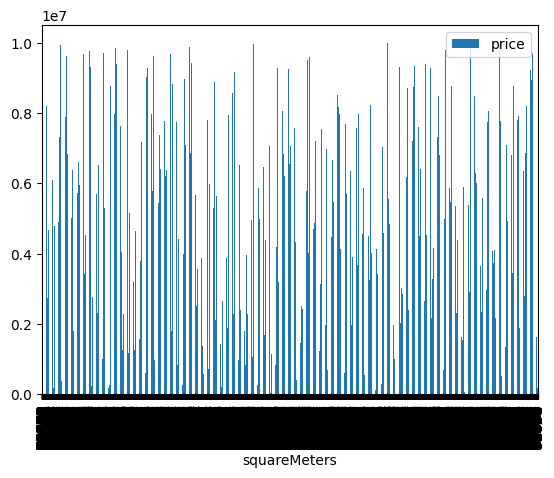

In [7]:
df.plot.bar(x='squareMeters', y='price')

<Axes: >

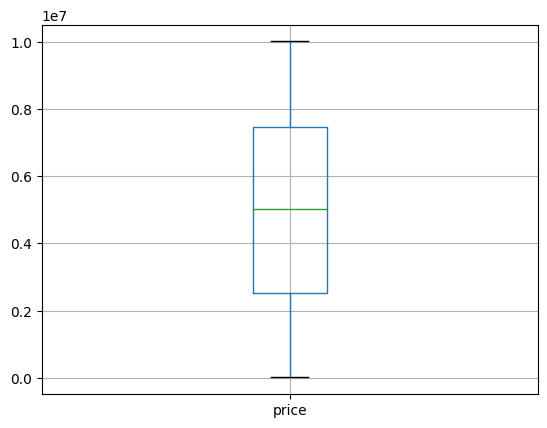

In [8]:
df.boxplot(column='price')

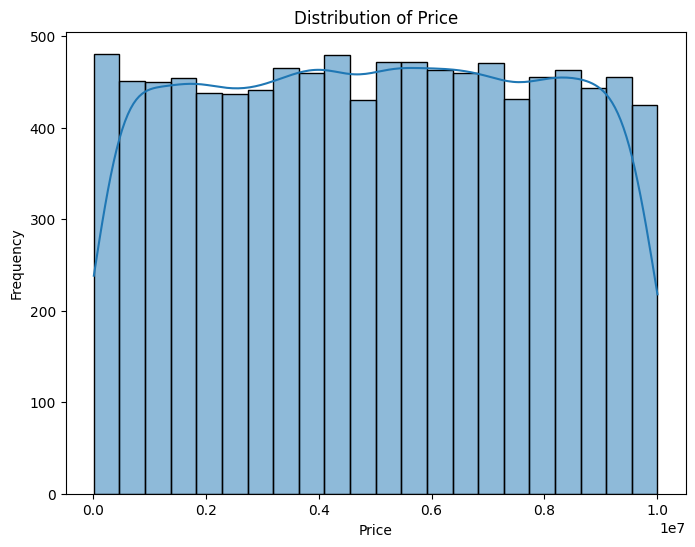

In [9]:
# Distribution of price
plt.figure(figsize=(8, 6))
sns.histplot(df['price'], kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

<Axes: ylabel='count'>

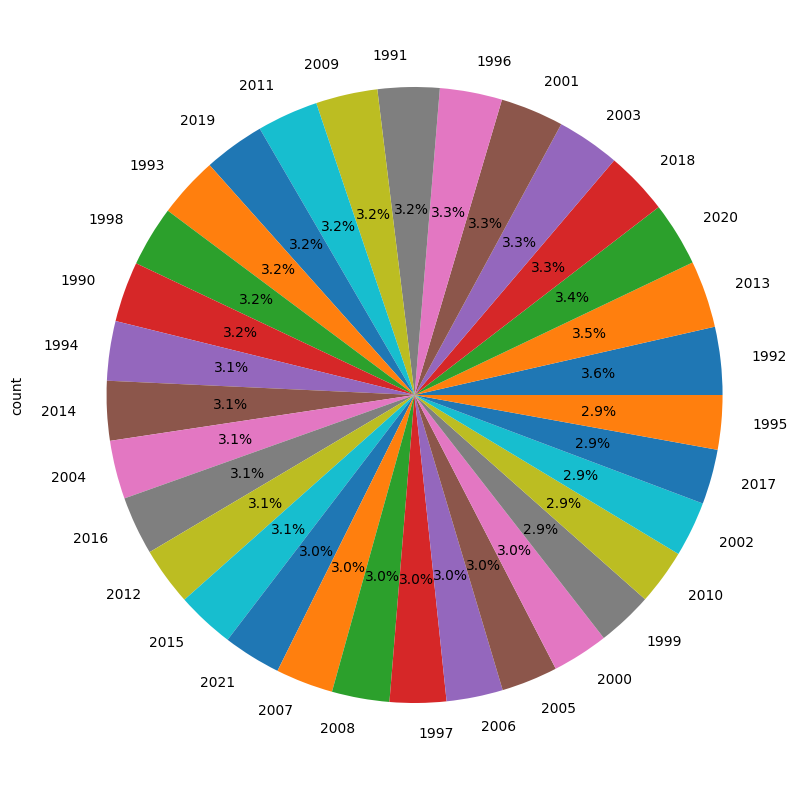

In [10]:
plt.figure(figsize=(12, 10))
df['made'].value_counts().plot.pie(autopct='%1.1f%%')

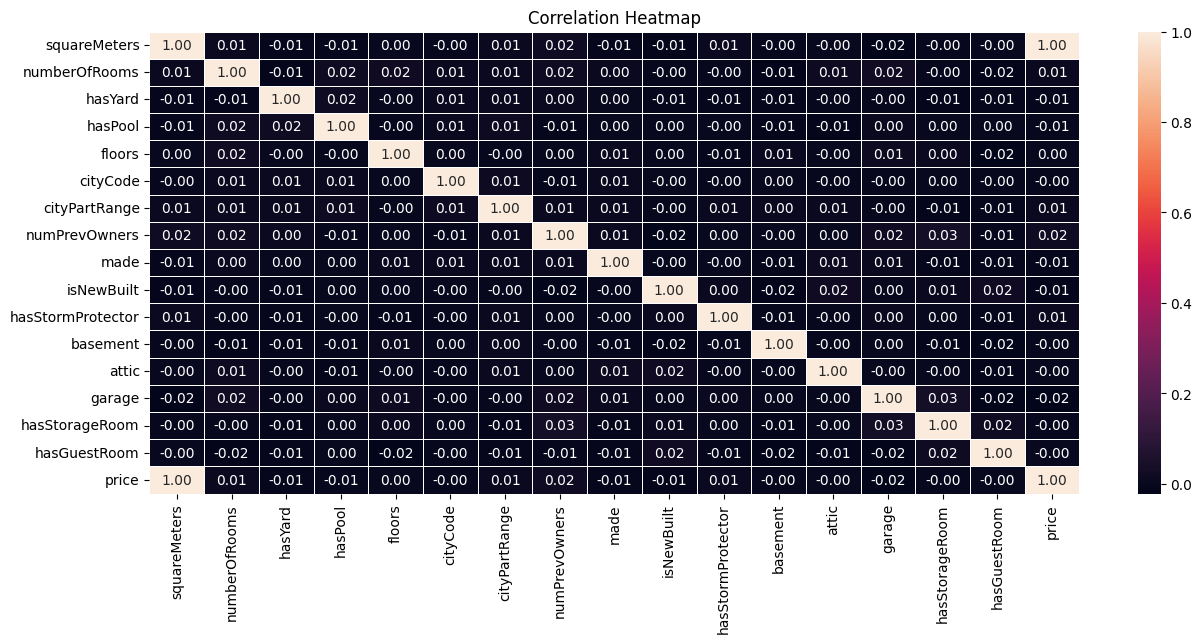

In [11]:
correlation_matrix = df.corr()
plt.figure(figsize=(15, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=.4)
plt.title('Correlation Heatmap')
plt.show()

In [12]:
df.columns

Index(['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'hasGuestRoom', 'price'],
      dtype='object')

In [13]:
# List of columns to normalize
columns_to_normalize = ['squareMeters', 'numberOfRooms', 'floors', 'cityPartRange',
                        'numPrevOwners', 'basement', 'attic', 'garage', 'hasGuestRoom']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the selected columns
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

In [14]:
df

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,0.891562,-1.643518,0,1,0.440453,9373,-0.874027,0.867593,2005,0,1,-0.250333,1.374130,1.537488,0,0.631373,7559081.5
1,1.073956,-0.394180,1,1,1.652041,39381,0.866993,0.167441,2015,1,0,-0.479772,-0.895592,-1.622370,1,-0.942810,8085989.5
2,0.203033,0.265193,0,1,-1.082685,34457,0.170585,0.867593,2021,0,0,-0.728678,1.321265,-1.595657,1,1.261046,5574642.1
3,-0.610092,-0.116549,0,0,-1.532703,27939,1.563401,-0.532710,2012,0,1,-1.520589,0.730080,-0.740816,0,-0.627973,3232561.2
4,0.714521,-1.088257,1,1,1.375106,38045,-0.874027,0.517517,1990,1,0,1.182616,-0.898010,-0.996505,1,-0.313136,7055052.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-1.673244,1.341012,0,1,-1.567320,73133,0.518789,0.167441,2009,0,1,1.487144,-1.150586,-1.278908,0,-0.313136,176425.9
9996,-0.190009,-0.741218,1,1,-1.325002,34606,1.215197,-0.532710,1990,0,1,1.400235,-1.135383,-1.233113,0,-1.572483,4448474.0
9997,1.180654,-1.643518,0,0,0.648154,80933,1.563401,1.567745,2005,1,1,1.137076,0.933592,-0.794243,1,1.261046,8390030.5
9998,0.318559,0.681639,0,0,1.582807,55856,-1.570434,-0.882786,2010,0,1,-0.849307,0.395962,-0.817141,1,-0.313136,5905107.0


In [15]:
y = df['price']
X = df.drop('price',axis=1)
X

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom
0,0.891562,-1.643518,0,1,0.440453,9373,-0.874027,0.867593,2005,0,1,-0.250333,1.374130,1.537488,0,0.631373
1,1.073956,-0.394180,1,1,1.652041,39381,0.866993,0.167441,2015,1,0,-0.479772,-0.895592,-1.622370,1,-0.942810
2,0.203033,0.265193,0,1,-1.082685,34457,0.170585,0.867593,2021,0,0,-0.728678,1.321265,-1.595657,1,1.261046
3,-0.610092,-0.116549,0,0,-1.532703,27939,1.563401,-0.532710,2012,0,1,-1.520589,0.730080,-0.740816,0,-0.627973
4,0.714521,-1.088257,1,1,1.375106,38045,-0.874027,0.517517,1990,1,0,1.182616,-0.898010,-0.996505,1,-0.313136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-1.673244,1.341012,0,1,-1.567320,73133,0.518789,0.167441,2009,0,1,1.487144,-1.150586,-1.278908,0,-0.313136
9996,-0.190009,-0.741218,1,1,-1.325002,34606,1.215197,-0.532710,1990,0,1,1.400235,-1.135383,-1.233113,0,-1.572483
9997,1.180654,-1.643518,0,0,0.648154,80933,1.563401,1.567745,2005,1,1,1.137076,0.933592,-0.794243,1,1.261046
9998,0.318559,0.681639,0,0,1.582807,55856,-1.570434,-0.882786,2010,0,1,-0.849307,0.395962,-0.817141,1,-0.313136


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [18]:
prediction = model.predict(X_train)
mse = mean_squared_error(y_train, prediction)
r2 = r2_score(y_train, prediction)
print(mse)
print(r2)

3575391.3397764894
0.9999995615399574


(array([  14.,  115.,  472., 1150., 2337., 2233., 1122.,  438.,  108.,
          11.]),
 array([-6965.27084718, -5563.94028381, -4162.60972044, -2761.27915707,
        -1359.9485937 ,    41.38196967,  1442.71253304,  2844.0430964 ,
         4245.37365977,  5646.70422314,  7048.03478651]),
 <BarContainer object of 10 artists>)

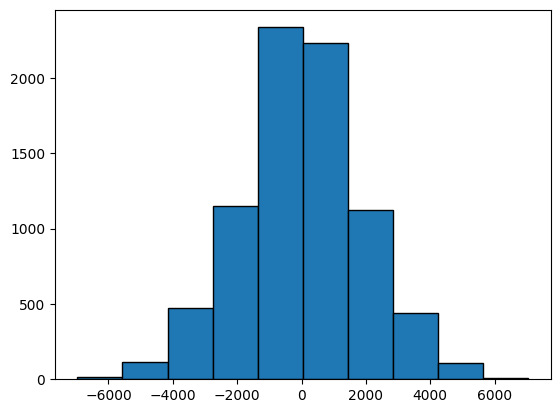

In [19]:
residuals = y_train - prediction
plt.hist(residuals,edgecolor='black')

Text(0.5, 1.0, 'Residuals vs Fitted')

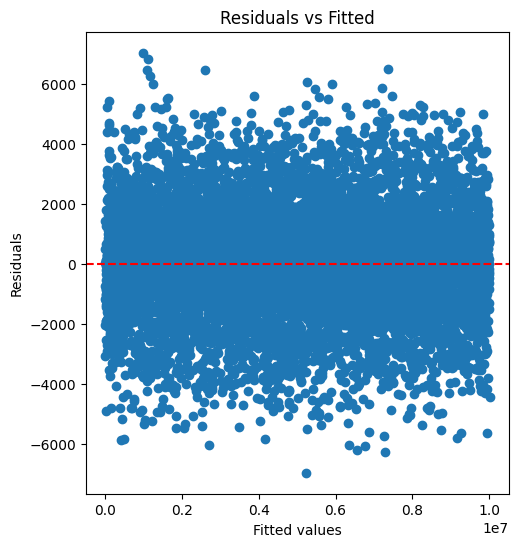

In [20]:
plt.figure(figsize=(12, 6))
# Residuals vs Fitted plot
plt.subplot(1, 2, 1)
plt.scatter(prediction, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')

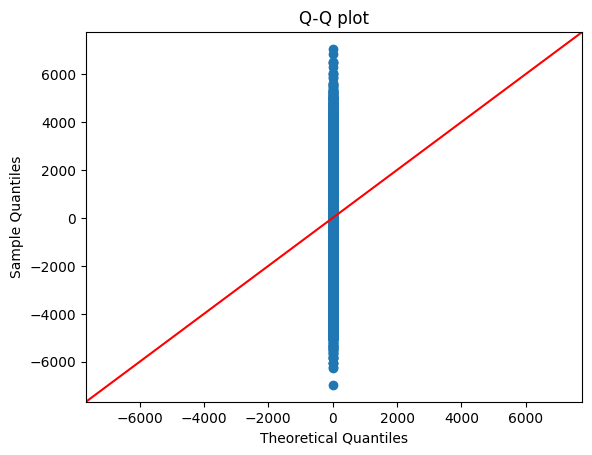

In [21]:
sm.qqplot(residuals, line='45')
plt.title('Q-Q plot')
plt.show()

In [22]:
# Shapiro-Wilk test for normality
shapiro_test = shapiro(residuals)
print(f'Shapiro-Wilk test statistic: {shapiro_test.statistic}, p-value: {shapiro_test.pvalue}')

Shapiro-Wilk test statistic: 0.9983373284339905, p-value: 1.6260754875929706e-07


c:\Users\SOUVIK\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [23]:
prediction = model.predict(X_test)
mse = mean_squared_error(y_test, prediction)
r2 = r2_score(y_test, prediction)
print(mse)
print(r2)

3695708.4406201527
0.9999995780555567


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


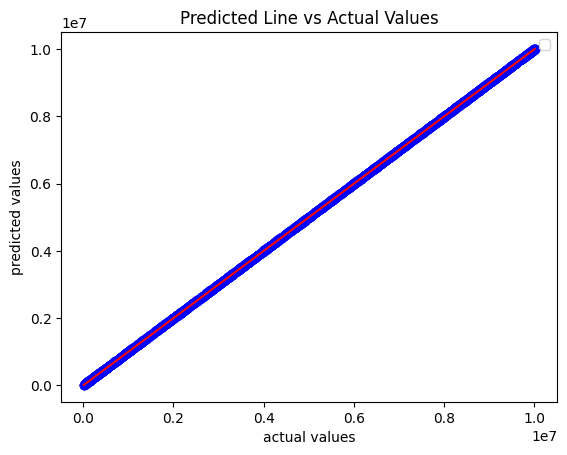

In [24]:
plt.scatter(y_test,prediction,  color='blue')
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],color="red")

plt.ylabel('predicted values')
plt.xlabel('actual values')
plt.title('Predicted Line vs Actual Values')
plt.legend()
plt.show()